<h1 style="display: flex; align-items: center; font-size: 50px; margin-bottom: 25px;">
  Anàlisi de la Petjada Hídrica dels Turistes a Barcelona
</h1>
<hr style="border: 1px solid grey;">
<img src="display/media/logos_report.png" alt="Image 1">
<hr style="border: 1px solid grey;">

# Índex

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Índex</title>
    <style>
        h1 {
            color:"white" ;
        }
        ul {
            list-style-type: none;
            padding-left: 0;
        }
        li {
            padding: 3px 0;
        }
        li a {
            text-decoration: none;
            color: white;
            font-size: 14px;
            font-weight: bold;
            transition: color 0.3s;
        }
        li a:hover {
            color: grey;
        }
        .sub-index {
            margin-left: 20px;
            margin-top: 2px;
            font-size: 10px;
        }
        .sub-index a {
            color: lightgrey;
        }
    </style>
</head>
<ul>
    <li><a href="#s1">1. Introducció</a>
        <ul class="sub-index">
            <li><a href="#s11">1.1 Introducció al challenge</a></li>
            <li><a href="#s12">1.2 Presentació del grup</a></li>
            <li><a href="#s13">1.3 Presentació de la idea</a></li>
        </ul>
    </li>
    <li><a href="#s2">2. Tractament de dades</a>
        <ul class="sub-index">
            <li><a href="#s21">2.1 Dades Requerides</a></li>
            <li><a href="#s22">2.2 Preprocessing</a></li>
            <li><a href="#s23">2.3 Obtenció de les dades meteorològiques i de precipitacions</a></li>
            <li><a href="#s24">2.4 Obtenció de les dades de turisme</a></li>
            <li><a href="#s25">2.5 Obtenció de les dades dels habitants de Barcelona</a></li>
            <li><a href="#s26">2.6 Correlació de les dades</a></li>
        </ul>
    </li>
    <li><a href="#s3">3. Creació de l'algorisme de predicció</a>
        <ul class="sub-index">
            <li><a href="#s31">3.1 Investigació prèvia</a></li>
            <li><a href="#s32">3.2 Descripció de inputs i outputs</a></li>
            <li><a href="#s33">3.3 Explicació del algoritme</a></li>
        </ul>
    </li>
    <li><a href="#s4">4. Validació de l'algorisme de predicció</a>
        <ul class="sub-index">
            <li><a href="#s41">4.1 Estudi de performance</a></li>
            <li><a href="#s42">4.2 Exemple del output</a></li>
        </ul>
    </li>
    <li><a href="#s5">5. Simulació</a>
        <ul class="sub-index">
            <li><a href="#s51">5.1 Explicació de l'objectiu de la simulació</a></li>
            <li><a href="#s52">5.2 Instruccions per córrer la simulació</a></li>
            <li><a href="#s53">5.3 Descripció de les pàgines de la simulació</a></li>
        </ul>
    </li>
    <li><a href="#s6">6. Recomanacions accionables</a>
        <ul class="sub-index">
            <li><a href="#s61">6.1 Recomanacions 8-12</a></li>
        </ul>
    </li>
    <li><a href="#s7">7. Escalabilitat</a></li>
        <ul class="sub-index">
            <li><a href="#s71">7.1 Dades meteorològiques i precipitacions</a></li>
            <li><a href="#s72">7.2 Dades de turisme</a></li>
            <li><a href="#s73">7.3 Dades de població</a></li>
            <li><a href="#s74">7.4 Re-entrenament del model</a></li>
        </ul>
    <li><a href="#s8">8. Conclusions</a>
        <ul class="sub-index">
            <li><a href="#s81">8.1 Efecte del turisme a Barcelona</a></li>
            <li><a href="#s82">8.2 Tancament del projecte</a></li>
        </ul>
    </li>
</ul>


<a id="s1"></a>
## 1. Introducció

<a id="s11"></a>
### 1.1 Introducció al challenge

El **AB Data Challenge** és una iniciativa d’Aigües de Barcelona (AGBAR) que, amb el suport d’universitats, centres de recerca i l’ecosistema d’innovació de Catalunya, busca fomentar la creativitat i la innovació mitjançant l'ús de les dades recopilades del servei de telelectura dels comptadors d’aigua. Aquesta iniciativa té com a objectiu generar solucions que millorin la gestió de l’aigua i promoguin la sostenibilitat, amb especial èmfasi en la reducció de l’impacte ambiental derivat del consum d’aigua.

En aquest context, el nostre grup ha decidit abordar el repte relacionat amb la **Sostenibilitat Hídrica Territorial**, amb un focus particular en el **turisme**, un dels factors que exerceix una gran pressió sobre els recursos hídrics de Barcelona. La creixent demanda d’aigua, influenciada per l’augment de turistes que visiten la ciutat, presenta un desafiament significatiu per a la gestió dels recursos hídrics urbans. A més, aquest fenomen s’accentua pels efectes del canvi climàtic, com les altes temperatures i les sequera, que augmenten la necessitat de garantir la sostenibilitat del sistema hídrico. 

Hem escollit aquest repte perquè creiem que les dades de telelectura dels comptadors d’aigua proporcionades per AGBAR, combinades amb dades externes com les de turisme, mobilitat i meteorologia, poden oferir una oportunitat única per desenvolupar models predictius que millorin la gestió de l’aigua i afavoreixin l’eficiència en el seu consum. En un context com el de Barcelona, on el turisme és una de les principals fonts de consum d’aigua, és fonamental poder integrar aquestes dades per reduir la pressió sobre els recursos hídrics i fomentar pràctiques més sostenibles en la gestió de l’aigua.

<a id="s12"></a>
### 1.2 Presentació del grup

Som un grup d'estudiants de l'assignatura de Gestió de Projectes, amb membres provinents de dues disciplines: **Enginyeria Matemàtica en Ciències de Dades** i **Enginyeria Informàtica**. Aquesta diversitat de formacions ens permet abordar el repte des de diferents perspectives, combinant coneixements teòrics i pràctics en l'àmbit de la gestió de dades, l'anàlisi estadística i la implementació de solucions tecnològiques. Ens enorgullim d'haver treballat tots en tots els àmbits del projecte, però per facilitar l'organització del projecte hem distribuit carrecs entre nosaltrs.

Els membres del grup i els seus càrrecs són els següents:


<style>
  /* General styles for both rows */
  .team-member {
    width: 25%;
    margin: 10px;
    background-color: #C8C8C8;
    padding: 15px;
    color: black;
    text-align: center;
    border-radius: 10px;
    transition: transform 0.3s ease, box-shadow 0.3s ease;
  }

  .team-member:hover {
    transform: scale(1.1); /* Make the member larger on hover */
    box-shadow: 0px 0px 20px rgba(0, 0, 0, 0.5); /* Add shadow effect */
  }

  /* Styles for the upper row */
  .upper-row .team-member {
    width: 25%;
  }

  /* Styles for the lower row */
  .lower-row .team-member {
    width: 30%;
  }
</style>
<div style="display: flex; justify-content: center; flex-wrap: wrap; text-align: center;">
  <!-- Top row (3 members) -->
  <div class="upper-row" style="display: flex; justify-content: center; flex-wrap: wrap;">
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4D03AQEe9r69YxPhVg/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1702547713065?e=1736380800&v=beta&t=NsDZiX6TL7l1a-ms_8RF1yxUSNJoBREEUPpqSMuU27M" alt="Bruno Manzano Clotet" width="100">
      <br><strong>Bruno Manzano Clotet</strong>
      <br><a href="https://www.linkedin.com/in/brunomanzano/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Audiovisual Responsible (AV)
      <br><strong>Responsibilities:</strong> Crear contingut visual i presentacions per comunicar els resultats de manera efectiva.
      <br><a href="mailto:bruno.manzano01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D5603AQGU6dT73FZacA/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1731424586525?e=1737590400&v=beta&t=4EeR5sVIFy6eYY97_pg9eDR1Acft7oEyg9rUSRI-TBU" alt="Iván Hernández Gómez" width="100">
      <br><strong>Iván Hernández Gómez</strong>
      <br><a href="https://www.linkedin.com/in/iv97n"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Technical Responsible (TR)
      <br><strong>Responsibilities:</strong> Responsable de l’anàlisi tècnica de les dades i el desenvolupament de models predictius.
      <br><a href="mailto:ivan.hernandez04@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4E03AQEbY575oX9IAA/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1682176916179?e=1736380800&v=beta&t=accroyrSl_GcfJkH98aTJkGfIAKmYNX7qcbPgjN137U" alt="Martí Oms Graells" width="100">
      <br><strong>Martí Oms Graells</strong>
      <br><a href="https://www.linkedin.com/in/martí-oms-graells"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Creative Responsible (CR)
      <br><strong>Responsibilities:</strong> Desenvolupar estratègies creatives per a la presentació de dades i resultats.
      <br><a href="mailto:marti.oms01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
  </div>
  <!-- Bottom row (2 members) -->
  <div class="lower-row" style="display: flex; justify-content: center; flex-wrap: wrap;">
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4D03AQEssjLTI5fjlQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1711454757196?e=1736380800&v=beta&t=XOADI__DBoNrkuHGorOjFv7-xoMKOKaKo78s97HZC-w" alt="Paula Mateos" width="100">
      <br><strong>Paula Mateos</strong>
      <br><a href="https://www.linkedin.com/in/paula-mateos-marin-954a90300/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Project Manager (PM)
      <br><strong>Responsibilities:</strong> Responsable de la gestió del projecte, assegurant-se que es compleixin els terminis i els lliurables.
      <br><a href="mailto:paula.mateos01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4E03AQHJMsWc_cbqUQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1673880445852?e=1736380800&v=beta&t=LWpE_eugEjTgNLJFYmlhP2MgAyxd-xcxiTORK1sDCxw" alt="Yuyan Wang" width="100">
      <br><strong>Yuyan Wang</strong>
      <br><a href="https://www.linkedin.com/in/yuyanwang03/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Implementation Responsible (IR)
      <br><strong>Responsibilities:</strong> Garantir que els models siguin implementables en un entorn real.
      <br><a href="mailto:yuyan.wang01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
  </div>
</div>


<a id="s13"></a>
### 1.3 Presentació de la idea

Barcelona és una ciutat que rep un nombre significatiu de turistes cada any, amb prop de 26 milions de visitants l'any 2023. Aquest flux de turistes exerceix una pressió considerable sobre els recursos locals, incloent el consum d’aigua. Les zones més turístiques, com el centre de la ciutat, la platja i altres punts d’interès, presenten un augment del consum d’aigua durant les temporades més altes. Això fa que la gestió d’aquest recurs sigui encara més complexa, ja que cal tenir en compte no només les necessitats de la població local, sinó també la variabilitat del consum degut al nombre de turistes presents en cada moment de l’any.


Barcelona és una ciutat que rep un nombre significatiu de turistes cada any, amb prop de 26 milions de visitants l'any 2023. Aquest flux de turistes exerceix una pressió considerable sobre els recursos locals, incloent el consum d’aigua. Les zones més turístiques, com el centre de la ciutat, la platja i altres punts d’interès, presenten un augment del consum d’aigua durant les temporades més altes. Això fa que la gestió d’aquest recurs sigui encara més complexa, ja que cal tenir en compte no només les necessitats de la població local, sinó també la variabilitat del consum degut al nombre de turistes presents en cada moment de l’any.

El consum d’aigua turístic és, per tant, una part essencial del consum global d’aigua a Barcelona. Així doncs, comprendre millor com els fluxos turístics influencien el consum d’aigua a la ciutat és un element clau per gestionar els recursos hídrics i garantir la sostenibilitat a llarg termini. En aquest context, el nostre projecte busca abordar aquest repte, proposant una solució que integri dades de turisme amb les de consum d’aigua per crear un model predictiu que pugui anticipar el consum específicament associat als turistes.

La nostra proposta es basa en la creació d'un model predictiu que utilitza les dades de telelectura dels comptadors d’aigua, combinades amb altres fonts de dades com les de turisme, climatologia i mobilitat urbana, per estimar el consum d’aigua de manera més precisa i dinàmica. L’objectiu és simular els patrons de consum de les zones turístiques de Barcelona, amb una especial atenció a la variabilitat temporal, com la temporada alta de turisme, les condicions meteorològiques i altres factors que poden influir directament en el consum d’aigua. Aquest model permetrà identificar en temps real l’impacte del turisme sobre els recursos hídrics i proporcionar una visió més clara de com gestionar el consum de manera eficient.

El caràcter innovador del nostre enfocament rau en la capacitat de crear una simulació interactiva que permet als usuaris inserir el nombre de turistes, ja sigui mensual o diari, i rebre una predicció de consum d’aigua per secció censal. Aquesta funcionalitat ofereix una interfície visual i intuïtiva que no només facilita la comprensió de l'impacte turístic sobre el consum d’aigua, sinó que també permet una resposta en temps real per ajudar a la gestió més eficient dels recursos hídrics. A través d’aquest enfocament, AGBAR podrà anticipar els canvis en la demanda d’aigua i adaptar-se als diferents escenaris segons els fluxos turístics.

Aquesta aproximació és única en el sentit que, més enllà de les tècniques tradicionals de modelatge de consum, inclou variables externes que afecten directament el comportament dels consumidors d’aigua, com el turisme. Aquesta innovació té un gran impacte potencial en la sostenibilitat dels recursos hídrics de Barcelona, permetent no només millorar la previsió i l'ús dels recursos disponibles, sinó també reduir la pressió sobre el sistema hídrico, especialment en aquells moments de l’any en què el turisme augmenta de manera significativa.

Els resultats esperats d’aquesta simulació són múltiples. En primer lloc, esperem aconseguir una predicció fiable del consum d’aigua per zones turístiques en funció de variables externes. Això amb l'objectiu d'ajudar a AGBAR a prendre decisions informades en temps real, optimitzant la distribució d’aigua i millorant la seva eficiència. A més, la possibilitat d’anticipar el consum d’aigua en funció dels fluxos turístics contribuirà a una gestió més sostenible dels recursos hídrics, disminuint l’impacte ambiental en les zones més afectades pel turisme. La capacitat d'adaptar-se als canvis d’aquests factors farà que el model sigui una eina flexible per afrontar la realitat canviant de Barcelona i altres ciutats amb dinàmiques similars.

Aquesta solució no només és innovadora, sinó que també representa una oportunitat real d’adaptar-se als reptes globals actuals, com el canvi climàtic i la sostenibilitat, i de generar un impacte positiu en la gestió de l’aigua a Barcelona. Creiem fermament que la nostra proposta no només s’ajusta als objectius del challenge, sinó que també aporta una contribució significativa a l’estratègia de sostenibilitat hídrica a llarg termini d’AGBAR. 

<a id="s2"></a>
## 2. Tractament de dades

<a id="s21"></a>

### 2.1 Dades requerides

El projecte parteix del dataset **daily_dataset.csv** proporcionat per AGBAR, que inclou dades detallades sobre el consum d’aigua a nivell diari i per secció censal. Aquest dataset constitueix la base principal del nostre model i conté els camps següents:  
- **Secció censal, districte i municipi**: per identificar zones geogràfiques concretes de consum.  
- **Data**: per analitzar la distribució temporal del consum d’aigua.  
- **Ús**: que especifica si l’aigua és utilitzada per a fins domèstics, industrials, comercials, o altres.  
- **Nombre de comptadors**: que indica quants dispositius registren el consum a cada secció.  
- **Consum acumulat (L/dia)**: volum d’aigua consumit diàriament en litres.  

Aquestes dades són indispensables per entendre la variabilitat del consum en funció de la geografia i del tipus d’ús. Tanmateix, per desenvolupar un model que integri els efectes del turisme i d’altres factors externs, necessitem ampliar aquesta informació amb noves fonts de dades:  

1. **Dades meteorològiques**:  
   - **Temperatura màxima i mínima diària**: el clima influeix directament en el consum d’aigua. Per exemple, en dies de calor intensa, el consum augmenta, especialment a zones turístiques amb activitats a l’aire lliure.  
   - **Precipitacions acumulades**: els dies de pluja redueixen el consum d’aigua en activitats a l’exterior, com el reg o les dutxes a platges i piscines.  

   Aquestes dades són crucials per ajustar el model als patrons estacionals i climàtics, que tenen un gran impacte en el consum d’aigua.  

2. **Dades de turisme**:  
   - **Pernoctacions diàries**: necessitem saber quants turistes s’allotgen a la ciutat cada dia. Aquesta informació reflecteix l'impacte del turisme en zones concretes i ajuda a identificar com els fluxos de visitants contribueixen al consum d’aigua en serveis com hotels, restaurants i activitats recreatives.  

   El turisme és un dels factors principals que volem analitzar. Per això, aquestes dades són essencials per segmentar el consum d’aigua atribuïble als visitants, diferenciant-lo del consum residencial o d'altres usos.

3. **Dades de població**
   - **Població de Barcelona per districtes**: necessitem informació de la població de Barcelona a cada període per poder relacionar-la al turisme i ajudar al model a generalitzar millor trobant patrons entre aquestes dues columnes.
   
   És important aportar el màxim de dades rellevants al model, la població de Barcelona és informació a considerar.

La integració d’aquestes dades ens permetrà desenvolupar un model predictiu que connecti el consum d’aigua amb variables climàtiques i turístiques, oferint prediccions més precises i útils per a la gestió sostenible dels recursos hídrics. Així, podrem respondre preguntes clau, com l’impacte específic del turisme en zones determinades o l’efecte de condicions meteorològiques extremes en el consum global.  

<a id="s22"></a>
### 2.2 Preprocessing

Per preparar el conjunt de dades per a l’anàlisi, carreguem i netegem les dades diàries de consum d’aigua. Aquest procés inclou renombrar les columnes per millorar la claredat, estandarditzar categories (per exemple, tipus d’ús d’aigua) i filtrar els registres vàlids específics de Barcelona. A més, convertim les dates a un format utilitzable i eliminem anomalies, com ara valors negatius de consum. Tot això assegura que les dades siguin consistents i estiguin llestes per integrar variables addicionals, com les meteorològiques i de turisme, per construir el model predictiu.

In [6]:
import pandas as pd
from collections import Counter
import seaborn as sns
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import re
import subprocess


import warnings
warnings.filterwarnings("ignore")

In [ ]:
daily_aigues = pd.read_csv("data/local_data/daily_dataset.csv", encoding='latin1')

# Rename columns for clarity
daily_aigues = daily_aigues.rename(columns={
    daily_aigues.columns[0]: 'Census Section',
    daily_aigues.columns[1]: 'District',
    daily_aigues.columns[2]: 'Municipality',
    daily_aigues.columns[3]: 'Date',
    daily_aigues.columns[4]: 'Use',
    daily_aigues.columns[5]: 'Number of Meters',
    daily_aigues.columns[6]: 'Accumulated Consumption'
})

# Filter data for Barcelona
daily_aigues_bcn = daily_aigues[daily_aigues['Municipality'] == "BARCELONA"]

# Convert Date column to datetime
daily_aigues_bcn['Date'] = pd.to_datetime(daily_aigues['Date'])

# Replace values in the 'Use' column
daily_aigues_bcn['Use'] = daily_aigues_bcn['Use'].replace({
    'Comercial/Comercial/Commercial': 'Commercial',
    'DomÃ¨stic/DomÃ©stico/Domestic': 'Domestic',
    'Industrial/Industrial/Industrial': 'Industrial'
})

# Drop rows with invalid Census Section or District values
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['Census Section'] != '<NULL>']
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['District'] != '>']

# drop nulls
daily_aigues_bcn = daily_aigues_bcn.dropna()

# Remove rows with Accumulated Consumption values below 0
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['Accumulated Consumption'] > 0]
daily_aigues_bcn= daily_aigues_bcn[daily_aigues_bcn['Census Section'].astype(str).str.startswith("8019")]

# cast district to int
daily_aigues_bcn['District'] = daily_aigues_bcn['District'].astype(int)


<a id="s23"></a>
### 2.3 Obtenció de les dades meteorològiques i de precipitacions

Per millorar l'anàlisi, integrem dades meteorològiques, això ho fem per afegir valors que tinguin trascendencia en el consum de l'aigua, ja que el nombre de turistes no és l'únic que afecta al consum. És per això que hem decidit incloure les temperatures màximes i mínimes diàries i els nivells de precipitació. Les dades utilitzades s'obtenen de la API de la AEMET: https://www.aemet.es/ca/datos_abiertos/AEMET_OpenData


Aquestes dades es grupen per data per calcular els valors mitjans, aquesta mitjana l'hem de fer ja que la base de dades utilitzada compta amb diferents observatoris des d'on es mesuren les dades, i per tant aquestes varien, però nosaltres preferim una mitjana per temes de simplicitat. A continuació, fusionem aquesta informació amb les dades netejades de consum d’aigua utilitzant la data com a clau. 
Aquest pas permet enllaçar els patrons meteorològics amb l’ús d’aigua, facilitant l’estudi de la seva influència en les tendències de consum.

In [8]:
clima_df = pd.read_csv('data/temperature_precipitation.csv')

# Convert 'fecha' column to datetime and group by date
clima_df['fecha'] = pd.to_datetime(clima_df['fecha'])
clima_df = clima_df.groupby('fecha').agg({
    'temp_max': 'mean',
    'temp_min': 'mean',
    'precipitacion': 'mean'
}).round(2).reset_index()

# Merge meteorological data with water consumption data
merged_data = daily_aigues_bcn.merge(clima_df, left_on='Date', right_on='fecha', how='left').drop(columns=['fecha'])

# Debug: Check the merged data
print("Merged data after adding meteorological data:")
print(merged_data.head())

Merged data after adding meteorological data:
  Census Section  District Municipality       Date         Use   
0      801901001         1    BARCELONA 2021-01-01  Commercial  \
1      801901001         1    BARCELONA 2021-01-01    Domestic   
2      801901001         1    BARCELONA 2021-01-01  Industrial   
3      801901001         1    BARCELONA 2021-01-02  Commercial   
4      801901001         1    BARCELONA 2021-01-02    Domestic   

   Number of Meters  Accumulated Consumption  temp_max  temp_min   
0                56                     2710      9.47      6.27  \
1               322                    10058      9.47      6.27   
2                10                   140646      9.47      6.27   
3                56                     3573     10.07      3.77   
4               322                     9600     10.07      3.77   

   precipitacion  
0           3.37  
1           3.37  
2           3.37  
3           0.00  
4           0.00  


In [9]:
# print unique values district
print("Unique values for the 'District' column:")
print(merged_data['District'].unique())

Unique values for the 'District' column:
[ 1  2  3  4  5  6  7  8  9 10]


<a id="s24"></a>
### 2.4 Obtenció de les dades de turisme

Ja per acabar en el que integració de dades es refereix, hem d'afegir les dades més importants pel nostres estudi concret, les dades de quants turistes hi ha cada dia a Barcelona. Però aquest procés ha estat molt més complicat del que ens esperavem. Per començar, no hi ha dades com a tal de les pernoctacions diaries a Barcelona, el màxim que hem trobat son dades de les pernoctacions mensuals, trobades contactant amb l'Observatori del Turisme a Barcelona: [Direcció de correu](info@observatoriturisme.barcelona).

Aquesta base de dades inclou les pernocatacions mensuals a Barcelona i el tipus d'allotjament:Establiments Hotelers, Albergs o Habitatges d'Ús Turístic, però aquests ultims els unificarem tots en un ja que per ara no és una dada relevant.


Però aquestes dades son mensulas, i nosaltres tenim el consum diari i volem fer una predicció diaria. Per tant, hem de distribuir totes les pernoctacions mensuals entre els diferents dies del mes, però com? Es evident que no tots els dies del mes venen les mateixes persones a Barcelona, els caps de setmana, per exemple, acostument a haver més visitants. La idea que vam tenir per fer la distribució va ser dividir entre dies del mes i afegir soroll (noise) a la distribució. Per tal d'afegir soroll necessitavem un indicador del nombre de turistes diaris, en vam torbar un parell. El primer era un dataset dels vols que arrivaben i marxaven cada dia, però englovaba tota Espanya, pel que vam acabar descartant aquesta via. L'altre indicador que vam trobar va ser un dataset de les transaccions diaries fetes amb targetes de BBVA i transaccions fetes a TPVs de BBVA. Es pot accedir a aquestes dades des de: https://dades.ajuntament.barcelona.cat/consum-privat/index.Rmd.


Evidentment son dades anonimitzades, però tenen un indicador més que és clau, segmenten entre transaccions fetes per extrangers i espanyols. Concretament hi ha un dataset amb el percentatge de transaccions fetes per estrangers i un altre amb el total de transaccions, de la combinació hem tret el nombre de transaccions fetes per turistes. Hem assumit que un turista espanyol es comporta com un tusista estranger.Així, hem pogut obtenir una distribució per aplicar soroll a les pernoctacions.

A continuació el codi i els passos seguits per integrar les dades de transaccions turístiques i pernoctacions al conjunt de dades de consum d’aigua per analitzar l’impacte del turisme en l’ús d’aigua. El procés consisteix en:  

1. **Carregar i netejar les dades**:  
   - Importem els conjunts de dades relacionats amb les transaccions turístiques (`dataset_targetes.csv`), les transaccions totals (`total_transactions.csv`) i les pernoctacions (`pernoctacions_2019_2024.csv`).  
   - Filtrarem les dades per als anys 2021–2023 i formatem les dates de manera consistent.  
   - Calculem una nova columna (`total_tourist_transactions`) que escala les transaccions de turistes estrangers segons el volum total de transaccions.  
2. **Agrupar dades mensuals**:  
   - Agrupem les transaccions turístiques per mesos per calcular el total de transaccions mensuals.  
   - Distribuïm els totals mensuals entre els dies individuals mitjançant percentatges diaris de transaccions, assegurant una assignació proporcional de les pernoctacions mensuals (`pernoctacions`) a cada dia.  
3. **Combinar i unificar dades**:  
   - Fusionem les dades de consum d’aigua amb les dades turístiques diàries (`resultado_df`) per integrar l’efecte del turisme a l’anàlisi.  
   - Realitzem agregacions per secció censal, data i altres factors clau per simplificar el conjunt de dades, mantenint mètriques rellevants com el consum total d’aigua i les pernoctacions turístiques.  

El resultat és un conjunt de dades unificat que vincula el consum d’aigua amb variables meteorològiques i turístiques, permetent una anàlisi exhaustiva de com aquests factors afecten les tendències diàries de consum d’aigua.

In [10]:
# Load and prepare the data
targetes = pd.read_csv('data/dataset_targetes.csv')

targetes = targetes.drop('Espanyola', axis=1)

# Convert the column to datetime format
targetes['Data'] = pd.to_datetime(targetes['Data'])

# Format the date as yyyy-mm-dd
targetes['Data'] = targetes['Data'].dt.strftime('%Y-%m-%d')

# Filter the DataFrame to include only dates from 2021 to 2023
targetes = targetes[(targetes['Data'] >= '2021-01-01') & (targetes['Data'] <= '2023-12-31')]

transactions = pd.read_csv('data/total_transactions.csv')

# Convert the column to datetime format
transactions['Data'] = pd.to_datetime(transactions['Data'])

# Format the date as yyyy-mm-dd
transactions['Data'] = transactions['Data'].dt.strftime('%Y-%m-%d')

# Filter the DataFrame to include only dates from 2021 to 2023
transactions = transactions[(transactions['Data'] >= '2021-01-01') & (transactions['Data'] <= '2023-12-31')]

# Set the date column as the index for both DataFrames to align dates easily
transactions.set_index('Data', inplace=True)
targetes.set_index('Data', inplace=True)

# Create the total_tourist_transactions column by multiplying Series 1 in transactions by Estrangera in targetes
targetes['total_tourist_transactions'] = (targetes['Estrangera'] * transactions['Series 1'])/100
targetes.reset_index(inplace=True)
transactions = targetes.drop('Estrangera', axis=1)

# Load the datasets
pernoctacions = pd.read_csv('data/pernoctacions_2019_2024.csv')

# Convert date columns to datetime
pernoctacions['Data'] = pd.to_datetime(pernoctacions['Data'], format='%m/%d/%Y')
transactions['Data'] = pd.to_datetime(transactions['Data'], format='%Y-%m-%d')

# Clean and convert the 'Pernoctacions' column to numeric
pernoctacions['Pernoctacions'] = pd.to_numeric(pernoctacions['Pernoctacions'].str.replace('.', ''), errors='coerce')

# Group transactions by month and calculate the total transactions per month
monthly_transactions = transactions.groupby(transactions['Data'].dt.to_period('M'))['total_tourist_transactions'].sum().reset_index()
monthly_transactions.columns = ['Month', 'Total Transactions']

# Merge monthly totals with daily transactions to calculate daily percentages
transactions = transactions.merge(monthly_transactions, left_on=transactions['Data'].dt.to_period('M'), right_on='Month', how='left')
transactions['Percentage of Transactions'] = transactions['total_tourist_transactions'] / transactions['Total Transactions']

# Remove unnecessary column
transactions.drop(columns=['Month'], inplace=True)

# Initialize the results list
resultados = []

# Loop through each row in pernoctacions to distribute monthly totals across days
for _, row in pernoctacions.iterrows():
    mes = row['Data'].month
    anyo = row['Data'].year
    pernoctaciones_mensuales = row['Pernoctacions']
    
    # Filter the transactions for the current month and year
    transactions_mes = transactions[(transactions['Data'].dt.month == mes) & (transactions['Data'].dt.year == anyo)]
    
    # Ensure the daily percentages add up to 1
    transactions_mes['Percentage of Transactions'] /= transactions_mes['Percentage of Transactions'].sum()
    
    # Distribute pernoctacions based on daily percentages
    for _, transaction in transactions_mes.iterrows():
        pernoctaciones_diarias = round(pernoctaciones_mensuales * transaction['Percentage of Transactions'])
        resultados.append({
            'Day': transaction['Data'],
            'tipus allotjament': row['Tipologia d\'allotjament'],
            'pernoctacions': pernoctaciones_diarias
        })

# Create the final DataFrame
resultado_df = pd.DataFrame(resultados)

# Display a sample of the final DataFrame

# Merge the water consumption data with the tourism data
final_data = merged_data.merge(resultado_df, left_on='Date', right_on='Day', how='left').drop(columns=['Day'])

# Grouping by all columns except 'tipus allotjament' and 'pernoctacions', and summing 'pernoctacions'
final_data = (
    final_data.groupby([
        "Census Section", "District", "Date", "Use", 
        "Number of Meters", "Accumulated Consumption", 
        "temp_max", "temp_min", "precipitacion"
    ], as_index=False)
    .agg({"pernoctacions": "sum"})
)



<a id="s25"></a>
### 2.5 Obtenció de les dades dels habitants de Barcelona

**Incorporació de dades de població per districtes**

Per poder tenir un model que generalitzi bé creiem necessari afegir dades de la població de Barcelona. Aquestes dades són independents al turisme i enriqueixen les relacións i els patrons potencials que pot trobar el model. Hem extret les dades d'un dataset públic disponible a la pàgina del portal de dades de l'Ajuntament de Barcelona: [Dataset Població](https://portaldades.ajuntament.barcelona.cat/es/estad%C3%ADsticas/yzlntdm2fs?view=chart&chart=line-chart&diff=D4jvG8AqBMEsFsCmA7AzrA9mywBllZpIDlpEAPYgJwwBtFiA3AQ1oFdFVJBCAhgQAZIAScg0A7l2DgA%2BwEZIAfQUBBADKqlxAC4BPAA4M%2BzSAF9QfePIBTkAMZ028bFLnSA7NIAckALJtksLawerCm5nDw-Aq6BpAA05AxnDhQLOwM0gCcXlmQtMwARoi0ACr6hgAisMbSAExCZhay0eWQADPSAKIuAGLSAMI5gwDiA3UNoIAoBOZazFQA5oha-QAWc1rEtLDIiAC0tmtUG2agQA&ccfg=N4Coxg9gdgZglgcxMAZSAbgQwDYFcCmIghAQgAucp2hALdSNhGDoeJgLQCiAyiBjgQDEIAJwC2mUiADlgFAIQAQQAecAM4AJfNgAO%2BYchQB9gEyGAjESLUAnnQAKuldHwqQ1RXQAmcTCBkBfEC0IOChSFS44AC9CYANTAEmAsFxhdBi4kBVRCAhSAAsQPwDSTGEEfFIAYTzSyXoQ-DYwGuFJPy)

La següent cel·la s'encarrega d'adjuntar aquestes dades mensuals de població per districte:
- Càrrega i transformació de dades de població:
    - Les dades de població per districtes (population_barcelona_districts.csv) es reformaten, canviant els noms de les columnes per números de districtes.
    - Es reformaten les dates per fer-les consistents amb la resta del conjunt de dades.
    - Es transforma el DataFrame per tenir una fila per districte, data i població.
- Unió amb el conjunt principal:
    - Es fusionen les dades de població amb el conjunt integrat de consum d’aigua i turisme. Com que les dades de població són mensuals, s’utilitza una columna auxiliar YearMonth per assegurar una fusió correcta.


In [11]:
population_district_ds = pd.read_csv('data/population_barcelona_districts.csv')

population_district_ds = population_district_ds.rename(columns={
    'Tiempo': 'Date',
    'Ciutat Vella': 1,
    'Eixample': 2,
    'Sants-Montjuïc': 3,
    'Les Corts': 4,
    'Sarrià-Sant Gervasi': 5,
    'Gràcia': 6,
    'Horta-Guinardó': 7,
    'Nou Barris': 8,
    'Sant Andreu': 9,
    'Sant Martí': 10
})

# Spanish month mapping
month_mapping = {
    "ene": "01", "feb": "02", "mar": "03", "abr": "04",
    "may": "05", "jun": "06", "jul": "07", "ago": "08",
    "sep": "09", "oct": "10", "nov": "11", "dic": "12"
}

# Function to convert the date using regex
def reformat_date(date_str):
    match = re.match(r"(\d{2}) (\w{3}) (\d{4})", date_str)
    if match:
        day, month, year = match.groups()
        month_num = month_mapping[month]
        return f"{year}-{month_num}-{day}"
    return date_str  # Return the original if no match

# Apply the function to the 'Tiempo' column
population_district_ds["Date"] = population_district_ds["Date"].apply(reformat_date)

# Convert 'Date' columns to datetime
final_data["Date"] = pd.to_datetime(final_data["Date"])
population_district_ds["Date"] = pd.to_datetime(population_district_ds["Date"])

# Now merge the datasets by Date and District, bear in mind the date in the population dataset is the first day of the month. So we need to create a year-month auxiliary column
final_data["YearMonth"] = final_data["Date"].dt.to_period('M')
population_district_ds["YearMonth"] = population_district_ds["Date"].dt.to_period('M')

# Change the population barcelona dataset to have the districts rows. Cols: Date, District, Population
population_district_ds = population_district_ds.melt(id_vars=["YearMonth"], var_name="District", value_name="Population")

# Now merge the datasets
final_data = final_data.merge(population_district_ds, on=["YearMonth", "District"], how="left")

# Drop the auxiliary column
final_data.drop(columns=["YearMonth"], inplace=True)

Finalment, ja podem guardar la base de dades i iniciar un analisi d'aquesta.

In [12]:
os.makedirs('data/local_data/', exist_ok=True)
final_data.to_csv('data/local_data/merged_cleaned_data_NEW.csv', index=False)
print(f"The dataset contains {final_data.shape[0]} rows.")

The dataset contains 2709139 rows.


In [13]:
# Grouping by the relevant columns and summing the required fields
final_data = (
    final_data.groupby([
        "Census Section", "District", "Date", "temp_max", "temp_min", "precipitacion", "pernoctacions"
    ], as_index=False)
    .agg({
        "Number of Meters": "sum",
        "Accumulated Consumption": "sum"
    })
)

# Drop the number of meters column
final_data.drop(columns=["Number of Meters"], inplace=True)

<a id="s26"></a>
### 2.6  Correlació de les dades

¡¡¡¡¡¡¡¡¡AQUESTA PART PODER NO LA POSEM!!!!!!!!!!

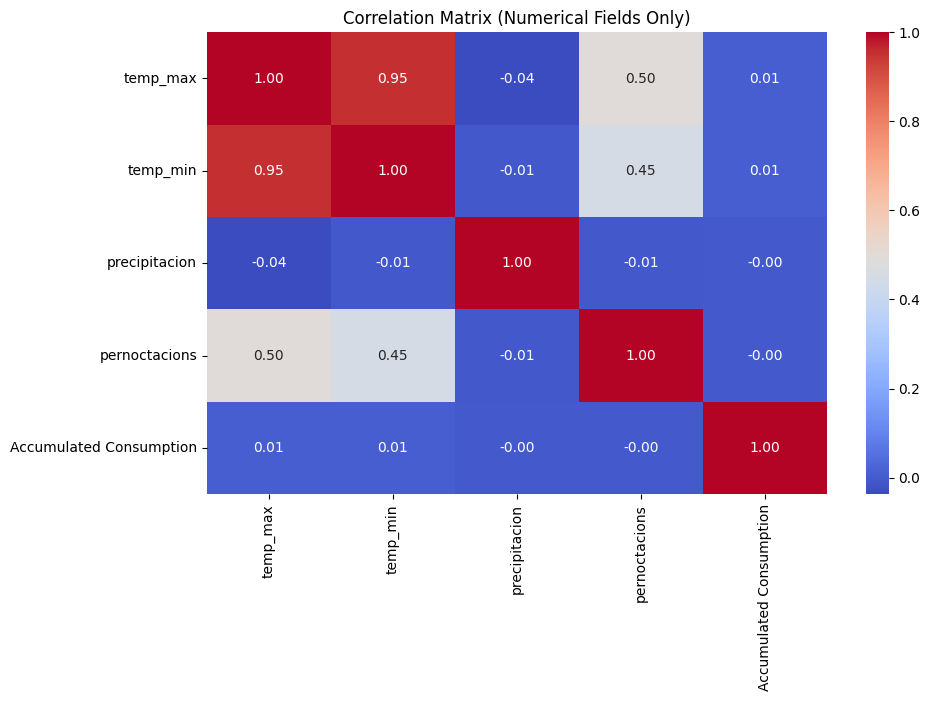

: 

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_cols = final_data.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix excluding non-numerical fields
filtered_correlation_matrix = final_data[numerical_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Fields Only)')
plt.show()



<a id="s3"></a>
## 3. Creació del algorisme de predicció

### 3.1 Investigació Previa 

La nostra recerca inicial es va centrar en l’anàlisi de sèries temporals, identificada com el component fonamental per a l’entrenament de models adaptats a les especificacions del nostre projecte. L’anàlisi de sèries temporals és particularment efectiva amb dades seriades que inclouen un component temporal; en aquest cas concret, organitzat diàriament. Aquest camp es divideix àmpliament en dues categories principals: tècniques de previsió de sèries temporals tradicionals i models moderns d’aprenentatge automàtic. La distinció principal entre aquests enfocaments rau en els seus mètodes i capacitats. Les tècniques tradicionals, com ARIMA i l’alissat exponencial (exponential smoothing), generalment es basen en fonaments estadístics per modelar les dades de manera lineal i són més adequades per a dades amb tendències clares i consistents i estacionalitat. D’altra banda, els models d’aprenentatge automàtic, incloent els random forests i les neural networks, ofereixen un enfocament més flexible capaç de capturar patrons no lineals complexos a través de l’ús d’algoritmes que aprenen de les dades, fent-los adequats per a sèries més volàtils amb estructures subjaents complexes.

Vam començar explorant models potencials adequats per als requisits específics del nostre projecte amb el model Seasonal AutoRegressive Integrated Moving Average (SARIMA), una variant de l’ARIMA que incorpora un component estacional per abordar les fluctuacions periòdiques. El model SARIMA és efectiu amb conjunts de dades més simples; però sovint té dificultats amb estructures de dades més complexes. Durant la nostra anàlisi, vam observar diversos resultats que van guiar el nostre procés de decisió. Els gràfics de diagnòstic, en particular el gràfic de residus i el gràfic Q-Q normal, van demostrar un ajust raonable, amb residus que no mostraven patrons discernibles i s’alineaven amb la distribució normal. No obstant això, els resultats del test de Ljung-Box, que no va mostrar autocorrelació significativa, juntament amb l’heteroscedasticitat alta observada, van indicar una variabilitat inconsistent en els errors del model a través de la sèrie temporal, suggerint una captura incompleta de la dinàmica del conjunt de dades. A més, una limitació significativa del model SARIMA és la necessitat de formar un model diferent de manera independent per a cada secció de cens o districte, i requereix coneixement previ sobre la selecció de l’ordre millor i l’ordre estacional dels paràmetres del model. Aquests factors combinats ens van portar a considerar enfocaments de modelatge alternatius que podrien acomodar més efectivament les complexitats inherents al nostre conjunt de dades divers.

Després dels nostres experiments inicials amb el model SARIMA, vam explorar l’ús del model Prophet de Facebook, conegut per la seva robusta gestió de dades de sèries temporals que mostren patrons estacionals forts i tendències irregulars. Prophet està dissenyat per incorporar fàcilment canvis en les tendències i els efectes estacionals, fent que inicialment semblés una eina prometedora per al nostre conjunt de dades, que implica dinàmiques complexes com el consum diari d’aigua i la variabilitat deguda a factors externs. Malgrat les capacitats de Prophet amb dades numèriques i el seu enfocament per modelar fluctuacions estacionals, les nostres avaluacions van indicar que el seu rendiment no era òptim per a les necessitats del nostre projecte. En les proves que implicaven prediccions de dades dins de la mostra, mentre que Prophet era capaç de generar previsions, els nivells d’exactitud no van complir amb les nostres expectatives. El gràfic de diagnòstic va destacar discrepàncies entre els valors predits i els punts de dades reals, suggerint que el model potser no captura tots els patrons subjacents de manera efectiva.

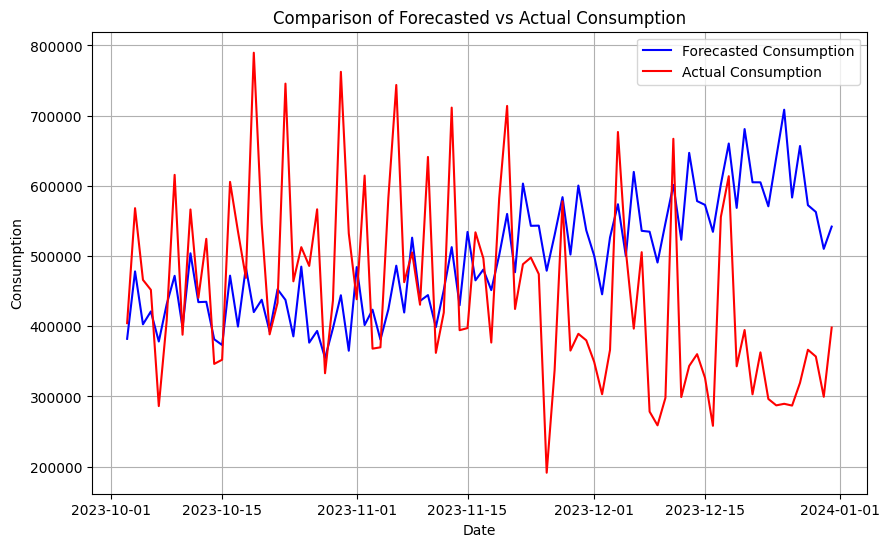

Les limitacions dels models explorats anteriorment provenien de la seva incapacitat per comptar amb la jerarquia relacional entre diferents districtes o seccions de cens, ja que estan dissenyats per manejar només una sèries única a la vegada. Per abordar millor les subtilitats estructurals del nostre conjunt de dades, que organitza les dades jeràrquicament, vam recórrer a un enfocament de previsió de sèries temporals jeràrquiques. Específicament, vam utilitzar un HTSRegressor, utilitzant un model SARIMAX com a motor de predicció subjacent. Aquesta elecció va estar motivada per l’aptitud de l’HTSRegressor per alinear-se estructural i lògicament amb la natura jeràrquica de les nostres dades, prometent una anàlisi més conscient del context. No obstant això, mentre l’HTSRegressor gestiona hàbilment la composició jeràrquica del conjunt de dades, roman com un model univariat, que prediu principalment el Consum Acumulat basat únicament en dades de consum anteriors. Aquest model no incorpora inherentment variables exògenes com el nombre de turistes o les condicions meteorològiques, que són clau per a previsions matissades en el nostre context. No obstant això, el potencial per integrar aquestes dades addicionals a l’HTSRegressor existeix i podria millorar significativament l’exactitud de les seves prediccions. Un inconvenient notable que vam trobar amb aquest model va ser la seva ocasiónal predicción de valors negatius per al consum, un resultat que és impracticable per als nostres propòsits.

Fins a aquest punt, els models que havíem explorat eren predominantment univariats, dissenyats per analitzar i predir basats en una sola sèrie de dades a la vegada. Aquest enfocament, tot i ser útil, pot no complir completament amb els requisits del nostre modelatge predictiu, especialment quan múltiples variables interrelacionades influeixen en el resultat. En conseqüència, vam canviar el nostre enfocament cap als models de Vector Autoregressió (VAR), que són inherentment multivariats i capaços de capturar les relacions entre diverses sèries temporals simultàniament. Vam implementar models VAR individualment per a cada districte o secció censal, permetent que el model prevegi valors futurs de manera autònoma sense la necessitat de configurar manualment els paràmetres. Tot i que les prediccions inicials van produir un marge d’error considerable, reconeixem el potencial substancial del model VAR per refinar i millorar les seves prediccions amb un conjunt de dades més extens. Les discussions detallades sobre les aplicacions específiques i el rendiment del model VAR seran exposades en altres seccions d’aquest document.

En la nostra recerca de models predictius efectius, també vam provar tècniques d’aprenentatge automàtic: Random Forest i Gradient Boosting, específicament utilitzant l’algoritme CatBoost. Aquests models van servir per establir una línia base de rendiment. Tot i que ambdós models van mostrar un rendiment global similar, CatBoost es particularment adequat per manejar conjunts de dades amb una proporció més alta de variables categòriques, com els identificadors de districte i secció de cens del nostre conjunt de dades. Aquest avantatge és degut a la capacitat inherent de CatBoost per processar dades categòriques directament, reduint així la necessitat d’un extens preprocés. Malgrat els seus avantatges teòrics, ambdós models van produir un Error Quadràtic Mitjà (MSE) d’aproximadament 19.635 milions, que indica un rendiment subòptim per a la nostra aplicació específica.

Donades les limitacions observades amb els models estadístics tradicionals i els models d’aprenentatge automàtic inicials, vam decidir avançar la nostra exploració en tecnologies de deep learning, específicament centrant-nos en un model de Long Short Term Memory (LSTM). Aquest model representa el nostre enfocament final per a la fase de simulació del nostre projecte. Les LSTMs són particularment hàbils en el maneig de dades de sèries temporals degut a la seva capacitat de recordar informació durant llargs períodes, la qual cosa és crucial per predir seqüències amb dependències temporals. Una discussió exhaustiva d’aquest model final, incloent la seva arquitectura, procés d’entrenament i aplicació específica al nostre conjunt de dades, serà proporcionada en les seccions següents.

### 3.2

<a id="s4"></a>
## 4. Validació del algorisme de predicció

<a id="s5"></a>
## 5. Simulació

<a id="s51"></a>

### 5.1 Explicació de l'objectiu de la simulació

Una simulació dels resultats, combinada amb un estudi estàtic, és essencial per a AGBAR perquè permet abordar de manera dinàmica i estratègica els reptes de la gestió hídrica. Aquí en detallem les raons principals:

#### **Raons per a la simulació:**  
1. **Adaptació immediata a situacions canviants:**  
   La simulació permet reaccionar en temps real davant factors com un augment sobtat de turistes o condicions meteorològiques extremes, ajustant la distribució d’aigua segons les necessitats.  

2. **Projecció de futurs escenaris:**  
   Mitjançant simulacions, AGBAR pot anticipar diferents escenaris de consum i preparar-se per a pics de demanda o situacions d’escassetat, optimitzant recursos de manera proactiva.  

#### **Raons per a l’estudi estàtic:**  
1. **Identificació de patrons a llarg termini:**  
   L’estudi estàtic ofereix una comprensió profunda de les tendències històriques i estructurals del consum d’aigua, ajudant a dissenyar polítiques sostenibles i ajustades a la realitat de cada zona.  

2. **Suport a la presa de decisions estratègiques:**  
   Amb dades estàtiques fiables, AGBAR pot justificar inversions en infraestructures i programes d’eficiència hídrica, basant-se en patrons comprovats i consistents.  

<a id="s52"></a>
### 5.2 Instruccions per corre la simulació

---

Per executar l'aplicació simplement cal executar el codi de baix.

---

#### **Accedir a l'aplicació**
- Quan executis la comanda, Streamlit obrirà automàticament l’aplicació al navegador web predeterminat.
- Per defecte, estarà disponible a l’adreça: [http://localhost:8501](http://localhost:8501).

---

#### **Aturar l’aplicació**
- Per aturar l’aplicació, simplement cal aturar l'execució de la casella següent.

---


In [ ]:
# Change to the 'display' directory
os.chdir('display')

# Run the Streamlit application
subprocess.run(["streamlit", "run", "main.py"])

Alternativament, es pot correr l'aplicació a través de la terminal:

### Com executar la simulació Streamlit de `main.py` des de la terminal

---

#### 1. **Obrir la terminal**
- Navega al directori display. 
- Accedeix al terminal o consola del teu sistema operatiu.

---

#### 2. **Executar Streamlit**
Utilitza la següent comanda per iniciar l’aplicació:

```bash
streamlit run display/main.py
```

---

#### 3. **Accedir a l'aplicació**
- Quan executis la comanda, Streamlit obrirà automàticament l’aplicació al navegador web predeterminat.
- Per defecte, estarà disponible a l’adreça: [http://localhost:8501](http://localhost:8501).

---

#### 4. **Aturar l’aplicació**
- Per aturar l’aplicació, torna a la terminal on s’està executant i prem **Ctrl+C**.

---

#### Problemes comuns
- Si la comanda `streamlit` no funciona, assegura’t que Streamlit està instal·lat correctament:
  ```bash
  pip install streamlit
  ```

<a id="s53"></a>

### 5.3 Descripció de les pàgines de la simulació

Aquesta aplicació té diverses pàgines de visualització on podràs conèixer més sobre el projecte, veure els detalls i explorar la informació. Aquí tens una explicació de com funciona cada pàgina i com navegar-hi:

---

### **Com Navegar Entre Pàgines**

- El **menú de navegació** (ubicat lateral de la pàgina) et permet canviar fàcilment entre pàgines.
- Simplement fes clic a **“Sobre Nosaltres,” “Sobre el Projecte,”**, **“Estudi Estàtic”** o **“Predicció”** per anar a la pàgina desitjada.

---

### **Pàgines de l'Aplicació**

#### **1. Sobre Nosaltres**

Aquesta pàgina presenta l'equip darrere del projecte. Podràs conèixer qui ha desenvolupat l'aplicació i obtenir més informació sobre les seves funcions.

#### **2. Sobre el Projecte**

Aquesta pàgina explica el propòsit i els objectius del projecte. Detalla el que l'aplicació està dissenyada per fer i com pot ajudar als usuaris.

#### **3. Estudi Estàtic**

   ##### **Objectiu:**
   Aquesta pàgina mostra dades estàtiques o resultats de recerca relacionats amb el projecte.

   ##### **Com fer-ho servir:**
   Aquí tens com funciona la selecció de períodes de temps per a tu com a usuari:

   1. **Tria un any:**
      - Primer, veuràs un menú desplegable etiquetat **"Seleccionar any"**. Aquí pots triar entre:
      - **Tots els anys** – Aquesta opció et permet veure les dades agrupades per tots els anys disponibles al conjunt de dades.
      - **2021**, **2022**, **2023** – Pots triar un any específic si vols centrar-te en les dades d'aquest any en concret.

   2. **Selecciona un mes (si cal):**
      - **Si seleccionas un any específic** (per exemple, **2021**, **2022**, **2023**), apareixerà un segon menú desplegable per seleccionar un mes. Aquest estarà etiquetat com **"Seleccionar mes"**, i podràs triar entre:
      - **Tots els mesos** – Aquesta opció et permet veure les dades agrupades per tots els mesos de l'any seleccionat.
      - **Gener**, **Febrer**, **Març**, etc. – Aquests són els mesos de l'any. Selecciona un mes per veure les dades d'aquest mes i any.

   3. **Com esgrupen les dades segons les teves seleccions:**
      - Si seleccionas **"Tots els anys"**, les dades s'agrupen per **mes**, mostrant tendències a través de tots els anys.
      - Si selecciones un **any** específic i **"Tots els mesos"**, les dades s'agrupen per **setmana** per a l'any seleccionat.
      - Si seleccionas un **any** i **mes** específic, les dades s'agrupen per **dia** per a aquest mes i any.

   D'aquesta manera, oferim un més precisió a mesura que les dates són més específiques.

   4. **Notes importants:**
      - Si no fas seleccions vàlides (per exemple, si no tries cap any o mes), veuràs una advertència que diu: **"Please make valid selections to generate the plots."** (Selecciona les opcions correctes per generar els gràfics.)

   5. **Gràfics mostrats**
      
      1. *Consum d'Aigua per Tipus d'Ús:* Mostra el consum d'aigua per categories com residencial, comercial i industrial, ajudant a identificar les àrees de major consum per a estratègies de conservació específiques.
         
      2. *Consum d'Aigua per Districte:* Compara el consum d'aigua entre diferents districtes, ressaltant les àrees amb major consum per orientar estratègies de reducció del consum.
         
      3. *Consum d'Aigua per Districte i Tipus d'Ús:* Desglossa el consum per districtes i tipus d'ús per proporcionar una visió detallada de com es distribueix el consum a través de les diferents zones de la ciutat.
         
      4. *Consum d'Aigua vs. Allotjaments Turístics:* Examina la relació entre els allotjaments turístics i el consum d'aigua, mostrant com els turistes influeixen en la demanda d’aigua.
         
      5. *Consum d'Aigua vs. Precipitació:* Analitza com la precipitació afecta el consum d'aigua, destacant períodes de sequera i pluja intensa.
      
      6. *Consum d'Aigua vs. Temperatura:* Mostra com les temperatures extremes poden augmentar el consum d'aigua en les llars i les indústries.

   ---

<a id="s6"></a>
## 6. Recomanacions accionables

<a id="s7"></a>
## 7. Escalabilitat

<a id="s71"></a>
### 7.1 Dades meteorològiques i precipitacions

L'API d'AEMET (Agencia Estatal de Meteorología) permet accedir a dades meteorològiques en temps real o històriques proporcionades per les seves estacions meteorològiques. Per accedir a aquestes dades, cal obtenir una **clau d'API** des del seu portal oficial. Aquesta clau s'inclou en les sol·licituds per autenticar-les.

### Funcionament bàsic
1. **Autenticació**: Cada sol·licitud a l'API ha d'incloure la clau generada.
2. **Endponts**: L'API ofereix diferents punts d'accés per a dades com ara:
   - Prediccions meteorològiques.
   - Observacions històriques.
   - Dades puntuals per estació meteorològica.
3. **Resposta**: Les dades es tornen en format JSON, amb valors com ara temperatures, precipitacions, velocitat del vent, etc.

### Mesures de temperatura i precipitació
Les dades meteorològiques que utilitzem són:
- **Temperatura mínima** (*tmin*): És la temperatura més baixa registrada durant un interval de temps (normalment, un dia).
- **Temperatura màxima** (*tmax*): És la temperatura més alta registrada durant el mateix interval.
- **Precipitacions acumulades** (*prec*): La quantitat total de pluja o neu fosa mesurada durant un període mesurada en mm.

### Estacions
Nosaltres hem decidit utilitzar les tres estacions de Barcelona i després fer la mitjana d'elles per un millor resultat. Si és volgués, es podria fer només amb una. Les estacions són les següents:
- **Estació 0076 - Barcelona, Fabra**
- **Estació 0201D - Barcelona, Port Olímpic**
- **Estació 0201X - Barcelona Drassanes**


Per continuar tenint la informació del temps actualitzada podeu fer servir el següent codi: [Extracció mensual de dades AEMET](altres\extracció_AEMET.py)
- Recordeu d'afegir la vostra **API key** proporcionada per **AEMET**.
- El codi està fet per treure les dades meteorològiques de l'últim mes. Per canviar els dies seleccionats, modifiqueu la secció sota <font color="darkgreen"># Calcular les dates per l'últim mes</font>
- El codi està pensat per treure en format csv les dades necessàries de l'últim mes. Si es volgués, també es podria afegir les noves línies al csv global.




Per a més informació visiteu: https://opendata.aemet.es/centrodedescargas/inicio


### API per predir dades meteorològiques a futur
A part de aconseguir les dades històriques meteorològiques és necessàri fer un pronòstic dels dies a predir per recolzar al model amb dades de valor i poder fer una bona predicció. Per aquest motiu hem fet una recerca i la [API meteoblue](https://www.meteoblue.com/es/weather-api/index/overview) ens permet obtenir dades de pronòstics futurs de manera molt senzilla. Hem fet diverses proves per comprovar la qualitat de les dades i ha resultat ser una bona eina. De totes maneres, per obtenir dades a més de 14 dies és necessària una subscripció de pagament. Com  que per bases de concurs no podem fer servir cap tipus d'eina de pagament simplement ho deixem anotat com a possible eina d'escalabilitat.

Per suplir la manca d'API gratuita per pronòstics de temps hem fet servir el nostre model de time series. S'ha de tenir en compte que aquestes dades milloraran significativament quan es proporcionin a través de la API.

<a id="s72"></a>
### 7.2 Dades de turisme

Per obtenir les dades de les pernoctacions és necessàri que contacteu amb l'Observatori del Turisme a Barcelona: [Direcció de correu](info@observatoriturisme.barcelona). De moment no hem trobat una API per aconseguir aquestes dades de forma automàtica, vam preguntar a l'Observatori del Turisme i ens van comentar que hauriem de contactar amb l'Oficina Municipal de Dades.

<a id="s73"></a>
### 7.3 Dades de població

Com hem comentat anteriorment el dataset que hem fet servir per les dades de la població de Barcelona l'hem extret d'aquesta pàgina: [Dataset Població de Barcelona](https://portaldades.ajuntament.barcelona.cat/es/estad%C3%ADsticas/yzlntdm2fs?view=chart&chart=line-chart&diff=D4jvG8AqBMEsFsCmA7AzrA9mywBllZpIDlpEAPYgJwwBtFiA3AQ1oFdFVJBCAhgQAZIAScg0A7l2DgA%2BwEZIAfQUBBADKqlxAC4BPAA4M%2BzSAF9QfePIBTkAMZ028bFLnSA7NIAckALJtksLawerCm5nDw-Aq6BpAA05AxnDhQLOwM0gCcXlmQtMwARoi0ACr6hgAisMbSAExCZhay0eWQADPSAKIuAGLSAMI5gwDiA3UNoIAoBOZazFQA5oha-QAWc1rEtLDIiAC0tmtUG2agQA&ccfg=N4Coxg9gdgZglgcxMAZSAbgQwDYFcCmIghAQgAucp2hALdSNhGDoeJgLQCiAyiBjgQDEIAJwC2mUiADlgFAIQAQQAecAM4AJfNgAO%2BYchQB9gEyGAjESLUAnnQAKuldHwqQ1RXQAmcTCBkBfEC0IOChSFS44AC9CYANTAEmAsFxhdBi4kBVRCAhSAAsQPwDSTGEEfFIAYTzSyXoQ-DYwGuFJPy). De totes maneres la pàgina té una API per poder baixar-se les dades programàticament i automatitzar el procés per motius d'escalabilitat.
Per fer servir aquesta API simplement s'ha de navegar al link que us hem adjuntat adalt. Un cop a la pàgina podem visualitzar les dades actualitzades, es pot baixar un csv amb la informació o es pot demanar accés a una API registran-te. A sobre del gràfic trobareu un botó amb tres punts verticals, si navegueu a `Data API` veureu la informació necessària per poder fer servir la seva API.

En comptes de carregar un dataset en local haureu de fer una trucada a la API per obtenir les dades, carregueu-les a la mateixa variable i el nostre codi preprocessarà les dades automàticament.



<a id="s74"></a>
### 7.4 Re-entrenament del model

Com sabem, les prediccións són més efectives quan tenim dades més recents. És per això que per futures prediccións caldrà actualitzar el dataset periòdicament per tal d'obtenir la màxima precisió. A continuació expliquem els passos a seguir per re-entrenar el model:
1. Substituir els datasets originals pels actualitzats amb el mateix format.
    - És molt important que tant l'esquema com el format i l'ordre siguin el mateix.
2. A partir de les APIs proporcionades prèviament descarregar els datasets de les dades que manquen.

El més important per al re-entrenament del model és canviar només els datasets originals (amb les APIs i dades actualitzades) perquè el preprocessament funcioni correctament. D'aquesta manera el format del dataset final serà sempre el mateix i el model podrà ser entrenat sense errors amb les dades actualitzades.

<a id="s8"></a>

## 8. Conclusions